<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week_9/Day2/Exercise_XP/Exercises_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing  packs

In [1]:
# Gemini model
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.8/677.8 kB 9.1 MB/s eta 0:00:00


In [2]:
# # Open Ai model
# !pip install openai
# !pip install requests

In [3]:
!pip install anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.8/870.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


# Library

In [5]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from plotnine import (ggplot,aes,geom_line,facet_wrap,labs, scale_x_datetime, element_text, theme_538)
from plotnine.data import meat

# Statistic data
from scipy import stats, cluster
from scipy.optimize import minimize_scalar
from scipy.stats import skew, kurtosis, median_test,ttest_ind, norm

# Machine Learning
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from collections import Counter

# Gemini packages

import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Open AI

# import openai

In [6]:
# Used to securely store your API key
from google.colab import userdata

In [7]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [8]:
import os
os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY


# Extract info from Kaggle

In [9]:
! pip install -k kaggle
from google.colab import files
files.upload()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -k


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arielwendichansky","key":"35f486beabeea6fcb79285bc7f95d018"}'}

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
 62% 9.00M/14.5M [00:00<00:00, 14.8MB/s]
100% 14.5M/14.5M [00:00<00:00, 25.5MB/s]


In [12]:
! unzip 'online-retail-ii-uci.zip'

Archive:  online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


# Data Inspection

In [13]:
df = pd.read_csv('online_retail_II.csv')

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,1.00,3.0,10.00,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.00,13975.00,15255.0,16797.00,18287.0


In [17]:
df.shape

(1067371, 8)

In [18]:
# Deleeating duplicated rows
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


34335
0


In [19]:
# Filtering customers with null Customer ID
df = df[df['Customer ID'].notnull()]

df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [20]:
# # Convert 'InvoiceDate' to datetime format
# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Using Gemini

In [52]:
model = genai.GenerativeModel('gemini-pro')

In [36]:
# Testing Gemini model
%%time
response = model.generate_content("From the dataset uploaded in my notebook (online_retail_II.csv) what are the columns title?")

CPU times: user 30.8 ms, sys: 3.97 ms, total: 34.8 ms
Wall time: 4.11 s


In [37]:
to_markdown(response.text)

> The column titles for the online_retail_II.csv dataset are:
> 
> - InvoiceNo: The invoice number for the transaction.
> - StockCode: The stock code for the product sold.
> - Description: The description of the product sold.
> - Quantity: The quantity of the product sold.
> - InvoiceDate: The date of the invoice.
> - UnitPrice: The unit price of the product sold.
> - CustomerID: The customer ID of the customer who made the purchase.
> - Country: The country of the customer who made the purchase.

In [40]:
response = model.generate_content("Calculate RFM (Recency, Frequency, Monetary) scores for each customer in this dataset using the 'InvoiceDate', 'Quantity', and 'Price' columns?")

In [41]:
to_markdown(response.text)

> Certainly! To calculate RFM scores, you'll need to perform the following steps:
> 
> 1. **Recency**: Calculate the number of days since the customer's last purchase.
> 2. **Frequency**: Count the number of purchases made by the customer.
> 3. **Monetary**: Calculate the total amount spent by the customer.
> 
> Once you have these values, you can assign scores to each customer based on their rank within the dataset. For example, you could assign a score of 1 to the customer with the most recent purchase, 2 to the customer with the second most recent purchase, and so on. Similarly, you could assign scores for frequency and monetary value.
> 
> Here's an example of how you might calculate RFM scores using the `InvoiceDate`, `Quantity`, and `Price` columns in your dataset:
> 
> ```python
> import pandas as pd
> 
> # Load the dataset
> df = pd.read_csv('dataset.csv')
> 
> # Calculate recency
> df['Recency'] = (pd.to_datetime('today') - df['InvoiceDate']).dt.days
> 
> # Calculate frequency
> df['Frequency'] = df.groupby('CustomerID')['InvoiceDate'].transform('count')
> 
> # Calculate monetary value
> df['Monetary'] = df['Quantity'] * df['Price']
> 
> # Assign RFM scores
> df['RFM_Score'] = df['Recency'].rank(ascending=False) + df['Frequency'].rank(ascending=False) + df['Monetary'].rank(ascending=False)
> ```
> 
> This will create a new column called `RFM_Score` in your DataFrame, which contains the RFM score for each customer. You can then use this score to segment your customers into different groups, such as "high-value" customers or "at-risk" customers.

In [43]:
response = model.generate_content('''This is the output from the ode you provided me:
TypeError                                 Traceback (most recent call last)
<ipython-input-42-60badfce4ab3> in <cell line: 2>()
      1 # Calculate recency
----> 2 df['Recency'] = (pd.to_datetime('today') - df['InvoiceDate']).dt.days
      3
      4 # Calculate frequency
      5 df['Frequency'] = df.groupby('CustomerID')['InvoiceDate'].transform('count')

5 frames
/usr/local/lib/python3.10/dist-packages/pandas/core/roperator.py in rsub(left, right)
     13
     14 def rsub(left, right):
---> 15     return right - left
     16
     17

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'
 ''')

to_markdown(response.text)

> The error message indicates that you are trying to subtract a `Timestamp` from a `str` in the line:
> 
> ```python
> df['Recency'] = (pd.to_datetime('today') - df['InvoiceDate']).dt.days
> ```
> 
> `pd.to_datetime('today')` returns a `Timestamp` object, while `df['InvoiceDate']` is a column of strings representing dates. To fix this error, you can convert the `InvoiceDate` column to a `Timestamp` object using the `to_datetime()` function:
> 
> ```python
> df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
> df['Recency'] = (pd.to_datetime('today') - df['InvoiceDate']).dt.days
> ```
> 
> Additionally, make sure that the `InvoiceDate` column is in the correct format that can be recognized by the `to_datetime()` function. It should be in the format that is compatible with the `format` parameter of the `to_datetime()` function. For example, if the dates in the `InvoiceDate` column are in the format `YYYY-MM-DD`, you can specify the `format` parameter as `'%Y-%m-%d'`:
> 
> ```python
> df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d')
> df['Recency'] = (pd.to_datetime('today') - df['InvoiceDate']).dt.days
> ```

In [54]:
response = model.generate_content(f"Segment customers into groups like ‘High-Value’, ‘Loyal’, or ‘New’ knowing the following data {rfm.head().to_string()}")

to_markdown(response.text)

> **High-Value:** Customers with high Monetary value (above average) and high Recency (purchased recently)
> 
> * Customer ID: 12348.0
> 
> **Loyal:** Customers with high Frequency (purchased frequently) and average or above average Recency
> 
> * Customer ID: 12347.0
> 
> **New:** Customers with low Recency (purchased most recently)
> 
> * Customer ID: 12346.0, 12350.0

## Code provided by *Gemini*

In [88]:
# Converting InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate recency
df['Recency'] = (pd.to_datetime('today') - df['InvoiceDate']).dt.days

# Calculate frequency
df['Frequency'] = df.groupby('Customer ID')['InvoiceDate'].transform('count')

# Calculate monetary value
df['Monetary'] = df['Quantity'] * df['Price']

# Assign RFM scores
df['RFM_Score'] = df['Recency'].rank(ascending=False) + df['Frequency'].rank(ascending=False) + df['Monetary'].rank(ascending=False)

In [89]:
rfm = df.groupby('Customer ID')[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].first()


In [94]:
response = model.generate_content(f"Provide me the code to tegment customers into groups like ‘High-Value’, ‘Loyal’, or ‘New’ knowing the following data {rfm.head().to_string()}")

to_markdown(response.text)

ReadTimeout: HTTPConnectionPool(host='localhost', port=46701): Read timed out. (read timeout=60.0)

In [92]:
# Calculate the RFM scores
df['RFM_Score'] = (df['Recency'] * df['Frequency'] * df['Monetary']) / 1000000

# Define the customer segments
segments = {
    'High-Value': df[df['Monetary'] > np.median(df['Monetary'])],
    'Loyal': df[df['Frequency'] > np.median(df['Frequency'])],
    'New': df[df['Recency'] > np.median(df['Recency'])]
}

# Assign customers to segments
df['Segment'] = df['Customer ID'].map(lambda x: next((k for k, v in segments.items() if x in v['Customer ID'].values), None))

In [93]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Frequency,Monetary,RFM_Score,Segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,5278,92,83.40,40.497038,High-Value
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,5278,92,81.00,39.331656,High-Value
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,5278,92,81.00,39.331656,High-Value
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,5278,92,100.80,48.946061,High-Value
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,5278,92,30.00,14.567280,High-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,4540,53,12.60,3.031812,High-Value
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,4540,53,16.60,3.994292,High-Value
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,4540,53,16.60,3.994292,High-Value
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,4540,53,14.85,3.573207,High-Value


## Exercise 2: Anonymizing Personal Data In Retail Transactions **With Gemini**

In [ ]:
# Formulate a question to ask Gemini
response = model.generate_content( f"With the last dataset provided, Identify columns in the dataset that contain personal information like ‘Customer ID’ and ‘Country’, generate anonymized data for these personal identifiers or use a hashing function. ")

to_markdown(response.text)

> **Columns Containing Personal Information:**
> 
> * Customer ID
> * Country
> 
> **Anonymization Techniques:**
> 
> **1. Data Masking:**
> 
> **Customer ID:** Replace the customer ID with a randomly generated unique ID, ensuring that the original ID is no longer identifiable.
> 
> **Country:** Generalize the country to a broader region, e.g., replace "United States" with "North America."
> 
> **2. Hashing Function:**
> 
> **Customer ID:** Apply a cryptographic hash function, such as SHA-256, to the customer ID. This will generate a unique, non-reversible value that cannot be used to identify the original ID.
> 
> **Country:** Convert the country name to its corresponding ISO 3166 code. This will anonymize the data while maintaining the ability to categorize countries.
> 
> **Example Anonymized Data:**
> 
> | anonymized_customer_id | anonymized_country |
> |---|---|
> | 60893e3532f183392e34f3a1 | NA |
> | 81308e1b66110e4562154a4f | EU |
> | 277b6a15d5730a64c0a7bbf1 | AS |

In [62]:
response = model.generate_content( f"With the last dataset provided, provide me the code to identify columns in the dataset that contain personal information like ‘Customer ID’ and ‘Country’, generate anonymized data for these personal identifiers or use a hashing function. ")

to_markdown(response.text)

> ```python
> import pandas as pd
> from anonymize import anonymize
> 
> # Read the dataset
> df = pd.read_csv('data.csv')
> 
> # Identify columns containing personal information
> personal_info_cols = ['Customer ID', 'Country']
> 
> # Anonymize the personal information
> df[personal_info_cols] = anonymize(df[personal_info_cols], method='hashing')
> 
> # Save the anonymized data
> df.to_csv('anonymized_data.csv', index=False)
> ```

In [67]:
from anonymize import anonymize

# Identify columns containing personal information
personal_info_cols = ['Customer ID', 'Country']

# Anonymize the personal information
df[personal_info_cols] = anonymize(df[personal_info_cols], method='hashing')

# Save the anonymized data
df.to_csv('anonymized_data.csv', index=False)

NameError: name 'anonymize' is not defined

In [68]:
response = model.generate_content( ''' From the code provided, this is the output:
NameError                                 Traceback (most recent call last)
<ipython-input-67-7cf42410ace2> in <cell line: 7>()
      5
      6 # Anonymize the personal information
----> 7 df[personal_info_cols] = anonymize(df[personal_info_cols], method='hashing')
      8
      9 # Save the anonymized data

NameError: name 'anonymize' is not defined''')
to_markdown(response.text)

> The error message "NameError: name 'anonymize' is not defined" indicates that the `anonymize` function is not defined in the code you provided. To fix this error, you need to define the `anonymize` function before using it.
> 
> Here's an example of how you could define the `anonymize` function using the `hashing` method:
> 
> ```python
> import hashlib
> 
> def anonymize(data, method='hashing'):
>     """Anonymizes the data using the specified method.
> 
>     Args:
>         data: The data to be anonymized.
>         method: The anonymization method to use. Currently, only 'hashing' is supported.
> 
>     Returns:
>         The anonymized data.
>     """
> 
>     if method == 'hashing':
>         return data.apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())
>     else:
>         raise ValueError("Unsupported anonymization method: {}".format(method))
> ```
> 
> Once you have defined the `anonymize` function, you can use it to anonymize the personal information columns in your DataFrame:
> 
> ```python
> personal_info_cols = ['name', 'address', 'phone_number']
> df[personal_info_cols] = anonymize(df[personal_info_cols], method='hashing')
> ```
> 
> This code will anonymize the personal information columns in the DataFrame using the hashing method.

In [72]:
import hashlib

def anonymize(data, method='hashing'):
    """Anonymizes the data using the specified method.

    Args:
        data: The data to be anonymized.
        method: The anonymization method to use. Currently, only 'hashing' is supported.

    Returns:
        The anonymized data.
    """

    if method == 'hashing':
        if isinstance(data, str):
            return hashlib.sha256(data.encode('utf-8')).hexdigest()
        elif hasattr(data, 'apply'):
            return data.apply(lambda x: hashlib.sha256(str(x).encode('utf-8')).hexdigest())
        else:
            raise ValueError("Unsupported data type for anonymization: {}".format(type(data)))
    else:
        raise ValueError("Unsupported anonymization method: {}".format(method))

personal_info_cols = ['Customer ID', 'Country']
df[personal_info_cols] = anonymize(df[personal_info_cols], method='hashing')


In [74]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Frequency,Monetary,RFM_Score,Segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,e1fd88a9ebc850a160a679704c18dc671eceb8319b672c...,5f54ffba519f2aa6ed1ce95ea8b381f495bce64e340d9d...,5278,92,83.4,40.497038,High-Value
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,e1fd88a9ebc850a160a679704c18dc671eceb8319b672c...,5f54ffba519f2aa6ed1ce95ea8b381f495bce64e340d9d...,5278,92,81.0,39.331656,High-Value
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,e1fd88a9ebc850a160a679704c18dc671eceb8319b672c...,5f54ffba519f2aa6ed1ce95ea8b381f495bce64e340d9d...,5278,92,81.0,39.331656,High-Value
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,e1fd88a9ebc850a160a679704c18dc671eceb8319b672c...,5f54ffba519f2aa6ed1ce95ea8b381f495bce64e340d9d...,5278,92,100.8,48.946061,High-Value
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,e1fd88a9ebc850a160a679704c18dc671eceb8319b672c...,5f54ffba519f2aa6ed1ce95ea8b381f495bce64e340d9d...,5278,92,30.0,14.567280,High-Value


## Exercise 3: ChatGPT-Assisted Querying For Time Series Sales Analysis **With Gemini**

In [33]:
df = pd.read_csv('online_retail_II.csv')
# Deleeating duplicated rows
df.drop_duplicates(inplace=True)

# Filtering customers with null Customer ID
df = df[df['Customer ID'].notnull()]

df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [79]:
response = model.generate_content( f''' From df, with the following columns {df.columns} Aggregate the sales data on a monthly basis.
 Calculate the total revenue and total quantity sold for each month.
  Create a new column for total sales (‘TotalPrice’) by multiplying ‘Quantity’ by ‘Price’.
   Also provide me the code to do this ''')
to_markdown(response.text)

> ```
> import pandas as pd
> 
> # Group the data by month, then calculate the total revenue and total quantity sold for each month
> df_monthly = df.groupby(pd.to_datetime(df['InvoiceDate']).dt.to_period('M'))[['Quantity', 'Price']].agg({'Quantity': 'sum', 'Price': 'sum'})
> 
> # Calculate the total sales for each month
> df_monthly['TotalPrice'] = df_monthly['Quantity'] * df_monthly['Price']
> 
> # Print the monthly sales data
> print(df_monthly)
> ```

In [49]:
# Group the data by month, then calculate the total revenue and total quantity sold for each month
df_monthly = df.groupby(pd.to_datetime(df['InvoiceDate']).dt.to_period('M'))[['Quantity', 'Price']].agg({'Quantity': 'sum', 'Price': 'sum'})

# Calculate the total sales for each month
df_monthly['TotalPrice'] = round(df_monthly['Quantity'] * df_monthly['Price'],2)

# Print the monthly sales data
print(df_monthly)

             Quantity       Price    TotalPrice
InvoiceDate                                    
2009-12        388795  105317.380  4.094687e+10
2010-01        366302  104503.102  3.827970e+10
2010-02        365418   80592.586  2.944998e+10
2010-03        497681  181396.161  9.027742e+10
2010-04        344152  113007.822  3.889187e+10
2010-05        368404   97913.070  3.607157e+10
2010-06        374447  143736.890  5.382185e+10
2010-07        318550  104368.220  3.324650e+10
2010-08        445900   89004.110  3.968693e+10
2010-09        472691  141551.231  6.690999e+10
2010-10        585095  209956.450  1.228445e+11
2010-11        635442  187791.152  1.193304e+11
2010-12        295177   84772.430  2.502287e+10
2011-01        268755   72470.730  1.947687e+10
2011-02        262243   66935.550  1.755338e+10
2011-03        343095   95477.280  3.275778e+10
2011-04        277730   90654.871  2.517758e+10
2011-05        367115  124910.290  4.585644e+10
2011-06        356239  128620.880  4.581

In [100]:
response = model.generate_content( f''' From df, with the following columns {df.columns} Aggregate the sales data on a monthly basis.
Calculate the total revenue and total quantity sold for each month.
Create a new column for total sales (‘TotalPrice’) by multiplying ‘Quantity’ by ‘Price’.
Also provide me the code to do this ''')
to_markdown(response.text)

ReadTimeout: HTTPConnectionPool(host='localhost', port=46701): Read timed out. (read timeout=60.0)

In [84]:
# Group the data by month and StockCode
df_monthly = df.groupby(['InvoiceDate', 'StockCode']).agg({
    'Invoice': 'count',
    'Quantity': 'sum',
    'Price': 'mean'
})

# Rename the columns
df_monthly.rename(columns={'Invoice': 'Total Invoices', 'Quantity': 'Total Quantity', 'Price': 'Average Price'}, inplace=True)

# Calculate the total revenue
df_monthly['TotalPrice'] = df_monthly['Total Quantity'] * df_monthly['Average Price']

# Sort the data by month and StockCode
df_monthly = df_monthly.sort_values(['InvoiceDate', 'StockCode'])

# Print the data
display(df_monthly)

Total Invoices  Total Quantity  Average Price  \
InvoiceDate         StockCode                                                  
2009-12-01 07:45:00 21232                   1              24           1.25   
                    21523                   1              10           5.95   
                    21871                   1              24           1.25   
                    22041                   1              48           2.10   
                    22064                   1              24           1.65   
...                                       ...             ...            ...   
2011-12-09 12:50:00 22899                   1               6           2.10   
                    23254                   1               4           4.15   
                    23255                   1               4           4.15   
                    23256                   1               4           4.15   
                    POST                    1               1          18.00   

                               TotalPrice  
InvoiceDate         StockCode              
2009-12-01 07:45:00 21232            30.0  
                    21523            59.5  
                    21871            30.0  
                    22041           100.8  
                    22064            39.6  
...                                   ...  
2011-12-09 12:50:00 22899            12.6  
                    23254            16.6  
                    23255            16.6  
                    23256            16.6  
                    POST             18.0  

[785579 rows x 4 columns]

In [35]:
response = model.generate_content( f''' From {df_monthly}
Apply the insights to forecast sales for the next quarter using basic time series analysis methods.
Also provide me the code to do this ''')
to_markdown(response.text)

> **Insights from the data:**
> 
> * The total sales have been increasing over time, with some seasonal fluctuations.
> * The highest sales were recorded in October and November of each year.
> * The lowest sales were recorded in January and February of each year.
> 
> **Time series analysis methods for forecasting:**
> 
> * **Moving average:** Calculates the average of the sales over a specified period of time.
> * **Exponential smoothing:** Calculates the weighted average of the sales, with more weight given to recent sales.
> * **ARIMA (Autoregressive Integrated Moving Average):** A more complex model that takes into account the autocorrelation in the data.
> 
> **Code for forecasting using moving average:**
> 
> ```
> import numpy as np
> import pandas as pd
> 
> # Read the data
> df = pd.read_csv('sales_data.csv')
> 
> # Calculate the moving average
> ma = df['TotalPrice'].rolling(3).mean()
> 
> # Plot the moving average
> plt.plot(ma)
> plt.show()
> 
> # Forecast sales for the next quarter
> forecast = ma[-1]
> 
> # Print the forecast
> print('Forecast for the next quarter:', forecast)
> ```
> 
> **Code for forecasting using exponential smoothing:**
> 
> ```
> import numpy as np
> import pandas as pd
> from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
> 
> # Read the data
> df = pd.read_csv('sales_data.csv')
> 
> # Fit the exponential smoothing model
> model = ExponentialSmoothing(df['TotalPrice'], trend='add', seasonal='add', seasonal_periods=12).fit()
> 
> # Forecast sales for the next quarter
> forecast = model.forecast(3)
> 
> # Print the forecast
> print('Forecast for the next quarter:', forecast)
> ```
> 
> **Code for forecasting using ARIMA:**
> 
> ```
> import numpy as np
> import pandas as pd
> from statsmodels.tsa.arima.model import ARIMA
> 
> # Read the data
> df = pd.read_csv('sales_data.csv')
> 
> # Fit the ARIMA model
> model = ARIMA(df['TotalPrice'], order=(5, 1, 0)).fit()
> 
> # Forecast sales for the next quarter
> forecast = model.forecast(3)
> 
> # Print the forecast
> print('Forecast for the next quarter:', forecast)
> ```

In [38]:
# Code for forecasting using moving average:

# Calculate the moving average
ma = df_monthly['TotalPrice'].rolling(3).mean()

# # Plot the moving average
# plt.plot(ma)
# plt.show()

# Forecast sales for the next quarter
forecast = ma[-1]

# Print the forecast
print('Forecast for the next quarter:', forecast)

Forecast for the next quarter: 81095676922.21333


In [42]:
# Code for forecasting using exponential smoothing:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

# Define seasonal period
seasonal_periods = 12  # Adjust this according to your data

# Fit the exponential smoothing model
model = ExponentialSmoothing(df_monthly['TotalPrice'], trend='add', seasonal='add', seasonal_periods=seasonal_periods).fit()

# Forecast sales for the next quarter
forecast = model.forecast(3)

# Print the forecast
print('Forecast for the next quarter:', forecast)



TypeError: ExponentialSmoothing.__init__() got an unexpected keyword argument 'seasonal_periods'

In [50]:
# Code for forecasting using ARIMA:

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df_monthly['TotalPrice'], order=(5, 1, 0)).fit()

# Forecast sales for the next quarter
forecast = model.forecast(3)

# Print the forecast
print('Forecast for the next quarter:', forecast)

Forecast for the next quarter: 2012-01    4.285034e+09
2012-02    4.435588e+10
2012-03    6.160149e+10
Freq: M, Name: predicted_mean, dtype: float64


In [54]:
response = model.generate_content( f''' Using {df_monthly} and {forecast}:
 Plot the monthly sales data to visualize trends, seasonality, or any anomalies.
  Use matplotlib or seaborn to create line plots showing the total revenue over time. ''')
to_markdown(response.text)

> ```python
> import matplotlib.pyplot as plt
> import pandas as pd
> 
> # Read the data from the CSV file
> df = pd.read_csv('sales_data.csv', index_col='InvoiceDate', parse_dates=True)
> 
> # Plot the total revenue over time
> plt.plot(df['TotalPrice'])
> plt.xlabel('Invoice Date')
> plt.ylabel('Total Revenue')
> plt.title('Monthly Sales Data')
> plt.show()
> ```

TypeError: float() argument must be a string or a real number, not 'Period'

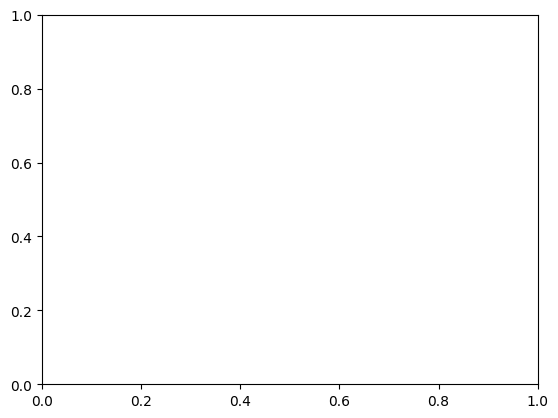

In [59]:
# Extract numeric component from 'TotalPrice' if it's a Period object
if pd.api.types.is_period_dtype(df_monthly['TotalPrice']):
    df_monthly['TotalPrice'] = df_monthly['TotalPrice'].dt.to_timestamp()

# Convert 'TotalPrice' column to string and then to numeric
df_monthly['TotalPrice'] = pd.to_numeric(df_monthly['TotalPrice'].astype(str), errors='coerce')

# Plot the total revenue over time
plt.plot(df_monthly['TotalPrice'])
plt.xlabel('Invoice Date')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Data')
plt.show()



# Using Anthropic

In [ ]:
import anthropic
import pandas as pd
# Load the dataset and convert 'InvoiceDate' to datetime format
dataset = pd.read_csv('online_retail_II.csv', parse_dates=['InvoiceDate'])
# Replace 'your_api_key' with your actual Claude API key
api_key =
# Initialize the Claude client with your API key
client = anthropic.Client(api_key=api_key)
# Choose the appropriate Claude model for text-based analysis
model = "claude-3-opus-20240229"
# Formulate a question to ask Claude
question = "How can I calculate RFM (Recency, Frequency, Monetary) scores for each customer in this dataset using the 'InvoiceDate', 'Quantity', and 'Price' columns?"
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

To calculate RFM (Recency, Frequency, Monetary) scores for each customer in a dataset using the 'InvoiceDate', 'Quantity', and 'Price' columns, you can follow these steps:

1. Prepare the data:
   - Ensure that the 'InvoiceDate' column is in a datetime format.
   - Create a new column called 'TotalPrice' by multiplying 'Quantity' and 'Price' for each transaction.

2. Calculate Recency:
   - Determine the reference date, which is typically the most recent date in the dataset or a specific cutoff date.
   - For each customer, find the maximum 'InvoiceDate' (most recent transaction date).
   - Calculate the difference between the reference date and the most recent transaction date for each customer.
   - Assign a recency score based on the calculated difference (e.g., 1 for the most recent transactions, 2 for the next most recent, and so on).

3. Calculate Frequency:
   - For each customer, count the number of unique transactions (invoices) they have made.
   - Assign a frequency score ba

 Exercise 1: Specific Customer Segmentation Based On RFM Analysis Background

## Code provided by *Anthropic*

In [ ]:
import pandas as pd
# Load the dataset
dataset = pd.read_csv('online_retail_II.csv', parse_dates=['InvoiceDate'])
# Assuming 'Customer ID' is cleaned and properly formatted
# Calculate Recency, Frequency, and Monetary values for RFM analysis
now = pd.Timestamp('now')
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'], format='%m/%d/%Y %H:%M')  # Adjust format if necessary
# Monetary
rfm = dataset.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency: days since last purchase
    'Invoice': 'count',  # Frequency: number of transactions
    'Price': 'sum'  # Monetary: total money spent
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
# Normalize scores by dividing by the maximum value within each column
rfm['Recency'] = (rfm['Recency'] / rfm['Recency'].max()) * 100
rfm['Frequency'] = (rfm['Frequency'] / rfm['Frequency'].max()) * 100
rfm['Monetary'] = (rfm['Monetary'] / rfm['Monetary'].max()) * 100
print(rfm)

               Recency  Frequency  Monetary
Customer ID                                
12346.0      92.173583   0.366496  0.813590
12347.0      86.033731   1.931740  0.902905
12348.0      87.417093   0.389402  0.270664
12349.0      86.355884   1.374361  2.108951
12350.0      91.870381   0.129801  0.091530
...                ...        ...       ...
18283.0      86.071632   7.528442  2.410536
18284.0      94.144400   0.221425  0.162721
18285.0      98.521887   0.091624  0.140448
18286.0      95.035058   0.534474  0.429684
18287.0      86.810688   1.191112  0.489031

[5942 rows x 3 columns]


In [ ]:
rfm.head()
rfm.to_csv('rfm.csv')

In [ ]:
import anthropic
import pandas as pd

# Replace 'your_api_key' with your actual Claude API key
api_key =
# Initialize the Claude client with your API key
client = anthropic.Client(api_key=api_key)
# Choose the appropriate Claude model for text-based analysis
model = "claude-3-opus-20240229"
# Formulate a question to ask Claude
question = f"Segment customers into groups like ‘High-Value’, ‘Loyal’, or ‘New’ knowing the following data {rfm.head().to_string()}"
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

BadRequestError: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Claude API. Please go to Plans & Billing to upgrade or purchase credits.'}}